# <p style="text-align: center;"> <b> Đồ án Quan hóa Dữ liệu </b> </p>


---

# 
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Mục lục</b></div>

<div class="list-group" id="list-tab" role="tablist">

   * [I. Data Understanding](#1)
        - [1. Đếm số dòng và số cột](#1.1)
        - [2. Viết bảng mô tả về các cột](#1.2)
        - [3. Lấy 5 điểm dữ liệu ra làm mẫu](#1.3)
        - [4. Phân tích tỷ lệ missing rate](#1.4)
        - [5. Phân tích tỷ lệ duplicate](#1.5)
        - [6. Fill missing rate](#1.6)
        
   * [II. EDA 1D](#2)
        - [1. Chia loại dữ liệu num hoặc cate](#2.1)
        - [2. Phân tích phân phối đối biến num](#2.2)
        - [3. Phân tích tỷ lệ đó với biến cate](#2.3)

   * [III. EDA 2D](#3)
        - [1. Phân tích hệ số tương quan giữa các biến num](#3.1)
        - [2. Sử dụng Scatter plot để phân tích dữ liệu 2D](#3.2)
        - [3. Sử dụng bar chart để phân tích dữ liệu num và cate](#3.3)
        - [4. Tính tỷ trọng đối với hai biến cate](#3.4)

   * [IV. EDA 3D](#4)
        - [1. Sử dụng Scatter plot để phân tích dữ liệu 3D cho ba biến num](#4.1)
        - [2. Sử dụng Scatter plot 2D và màu đối với hai biến num và cate](#4.2)
        - [3. Tính tỷ trọng theo bin chia theo thể loại với hai biến cate](#4.3)

   * [V. Insight](#5)

---

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Import thư viện cần thiết</b></div>


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Đọc dữ liệu</b></div>

In [2]:
df = pd.read_csv("data/hotel_bookings.csv")

<a id="1"></a>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>I. Data Understanding</b></div>

<a id="1.1"></a>

## <span style='color:#2B9C15 '>1. Đếm số dòng và số cột </span>

In [3]:
nrows, ncols = df.shape

print(f"Số dòng của tập dữ liệu: {nrows}")
print(f"Số cột của tập dữ liệu: {ncols}")

Số dòng của tập dữ liệu: 119390
Số cột của tập dữ liệu: 32


<a id="1.2"></a>

## <span style='color:#2B9C15 '>2. Viết bảng mô tả về các cột </span>

Mỗi dòng trong bộ dữ liệu gồm thông tin về một lượt đặt phòng khách sạn. Các cột trong bảng dữ liệu được mô tả như sau:

| **Tên cột** | **Ý nghĩa** |
| --- | --- |
| **`hotel`** | Tên khách sạn (Resort Hotel hoặc City Hotel) |
| **`is_canceled`** | 1 nếu lượt đặt bị hủy, 0 nếu không |
| **`lead_time`** | Số ngày giữa ngày đặt phòng và ngày nhận phòng |
| **`arrival_date_year`** | Năm của ngày nhận phòng |
| **`arrival_date_month`** | Tháng của ngày nhận phòng |
| **`arrival_date_week_number`** | Số tuần trong năm của ngày nhận phòng |
| **`arrival_date_day_of_month`** | Ngày nhận phòng |
| **`stays_in_weekend_nights`** | Số đêm cuối tuần (Thứ 7 và Chủ Nhật) mà khách ở hoặc đặt phòng để ở |
| **`stays_in_week_nights`** | Số đêm trong tuần (từ Thứ 2 đến Thứ 6) mà khách ở hoặc đặt phòng để ở |
| **`adults`** | Số người lớn |
| **`children`** | Số trẻ em |
| **`babies`** | Số em bé |
| **`meal`** | Loại bữa ăn được đặt (Undefined/SC – không bao gồm bữa ăn, BB – Bữa sáng, HB – Bữa sáng và bữa tối, FB – Bữa sáng, bữa trưa và bữa tối) |
| **`country`** | Mã quốc gia của khách (dựa trên ISO 3155-3:2013) |
| **`market_segment`** | Phân khúc thị trường của khách hàng thuộc về (TA: Travel Agents, TO: Tour Operators) |
| **`distribution_channel`** | Kênh phân phối mà qua đó lượt đặt được thực hiện (TA: Travel Agents, TO: Tour Operators) |
| **`is_repeated_guest`** | 1 nếu khách đã từng đặt phòng trước đó, 0 nếu không |
| **`previous_cancellations`** | Số lần hủy đặt phòng trước đó của khách |
| **`previous_bookings_not_canceled`** | Số lần đặt phòng trước đó mà không bị hủy của khách |
| **`reserved_room_type`** | Mã loại phòng đã đặt |
| **`assigned_room_type`** | Mã loại phòng được gán cho lượt đặt |
| **`booking_changes`** | Số lần thay đổi thông tin đặt phòng trước khi nhận phòng hoặc trước khi hủy |
| **`deposit_type`** | Loại tiền đặt cọc đã đặt (No Deposit – không đặt cọc, Non Refund – đặt cọc không hoàn lại toàn bộ, Refundable – đặt cọc hoàn lại toàn bộ) |
| **`agent`** | ID của đại lý đặt phòng |
| **`company`** | ID của công ty (thực thể) đặt phòng hoặc trả tiền cho lượt đặt |
| **`days_in_waiting_list`** | Số ngày mà lượt đặt đã nằm trong danh sách chờ trước khi được xác nhận |
| **`customer_type`** | Loại đặt phòng (Contract, Group, Transient, Transient-Party) |
| **`adr`** | Tỉ lệ giá phòng mỗi đêm |
| **`required_car_parking_spaces`** | Số lượng chỗ đậu xe mà khách yêu cầu |
| **`total_of_special_requests`** | Số lượng yêu cầu đặc biệt từ khách |
| **`reservation_status`** | Trạng thái cuối cùng của lượt đặt (Canceled, Check-Out, No-Show) |
| **`reservation_status_date`** | Ngày cuối cùng mà trạng thái cuối cùng được cập nhật |

<a id="1.3"></a>

## <span style='color:#2B9C15 '>3. Lấy 5 điểm dữ liệu ra làm mẫu </span>

In [4]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
98060,City Hotel,0,296,2016,September,39,21,0,4,2,...,No Deposit,26.0,NaN,0,Transient-Party,117.0,0,1,Check-Out,9/25/2016
10706,Resort Hotel,1,103,2017,March,13,27,1,1,2,...,Non Refund,495.0,NaN,0,Transient,73.0,0,0,Canceled,12/23/2016
83277,City Hotel,0,50,2016,January,4,22,2,3,2,...,No Deposit,28.0,NaN,0,Transient,60.0,0,0,Check-Out,1/27/2016
60000,City Hotel,1,305,2016,November,45,4,1,2,2,...,Non Refund,21.0,NaN,0,Transient,89.0,0,0,Canceled,2/1/2016
75082,City Hotel,1,283,2015,July,31,27,1,1,2,...,Non Refund,1.0,NaN,0,Transient-Party,62.0,0,0,Canceled,6/29/2015


<a id="1.4"></a>

## <span style='color:#2B9C15 '>4. Phân tích tỷ lệ missing rate </span>

### 👉 Tỷ lệ missing rate của các cột trong bộ dữ liệu

In [5]:
missing_rates = df.isna().sum() / len(df) * 100
missing_rates_df = pd.DataFrame({'Tên cột': missing_rates.index, 'Tỉ lệ thiếu dữ liệu (%)': missing_rates.values})
missing_rates_df = missing_rates_df.sort_values(by="Tỉ lệ thiếu dữ liệu (%)", ascending=False)
missing_rates_df.style.background_gradient(cmap='Reds', subset=['Tỉ lệ thiếu dữ liệu (%)'])
# missing_rates_df.style.bar(subset=['Tỉ lệ thiếu dữ liệu (%)'], color='#d65f5f')

,Tên cột,Tỉ lệ thiếu dữ liệu (%)
24,company,94.306893
23,agent,13.686238
13,country,0.408744
10,children,0.003350
19,reserved_room_type,0.000000
20,assigned_room_type,0.000000
21,booking_changes,0.000000
22,deposit_type,0.000000
0,hotel,0.000000
17,previous_cancellations,0.000000


### 👉 Tỷ lệ missing rate của các dòng trong bộ dữ liệu

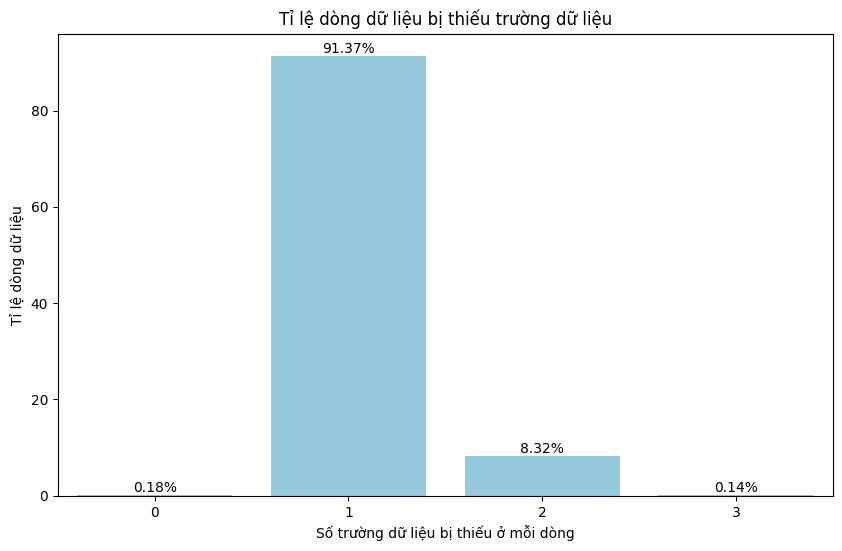

In [6]:
missing_rates_rows = df.isna().sum(axis=1)
missing_rates_rows = missing_rates_rows.value_counts().sort_index() / len(df) * 100
# ghi số lên biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_rates_rows.index, y=missing_rates_rows.values, color='skyblue')
plt.xlabel('Số trường dữ liệu bị thiếu ở mỗi dòng')
plt.ylabel('Tỉ lệ dòng dữ liệu')
plt.title('Tỉ lệ dòng dữ liệu bị thiếu trường dữ liệu')
for i in range(len(missing_rates_rows)):
    plt.text(i, missing_rates_rows.values[i], f'{missing_rates_rows.values[i]:.2f}%', ha='center', va='bottom')
plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Có 4 cột bị thiếu dữ liệu và trong đó có cột `company` thiếu dữ liệu nhiều nhất với tỷ lệ missing rate hơn 94%.

- Các dòng trong bộ dữ liệu bị thiếu khoảng 1-3 trường dữ liệu. Gần như toàn bộ các dòng (hơn 99%) đều mất ít nhất 1 trường dữ liệu, chủ yếu là do cột `company` bị thiếu dữ liệu.

<a id="1.5"></a>

## <span style='color:#2B9C15 '>5. Phân tích tỷ lệ duplicate </span>

In [7]:
duplicate_rate = df.duplicated().sum() / len(df)
print(f"Tỷ lệ dòng dữ liệu bị trùng lặp là: {round(duplicate_rate, 4) * 100}%")

# Loại bỏ các dòng trùng lặp
df = df.drop_duplicates()
print(f"Số dòng dữ liệu sau khi loại bỏ trùng lặp: {len(df)}")

Tỷ lệ dòng dữ liệu bị trùng lặp là: 26.8%
Số dòng dữ liệu sau khi loại bỏ trùng lặp: 87396


<a id="1.6"></a>

## <span style='color:#2B9C15 '>6. Fill missing rate </span>

In [8]:
df = df.fillna(-1)

<a id="2"></a>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> II. EDA 1D </b></div>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

<a id="2.1"></a>

## <span style='color:#2B9C15 '>1. Chia loại dữ liệu numerical hoặc categorical</span>

Vì hai biến `is_canceled` và `is_repeated_guest` chỉ có giá trị 0 hoặc 1 nên ta coi chúng là biến categorical.

In [10]:
#convert to category
df['is_canceled'] = df['is_canceled'].astype('object')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('object')

In [11]:
## 1. Chia loại dữ liệu numeric hoặc categorical
cate_list = list(df.dtypes[df.dtypes == 'object'].index)
num_list = list(df.dtypes[df.dtypes != 'object'].index)

<a id="2.2"></a>

## <span style='color:#2B9C15 '>2. Phân tích phân phối đối biến numerical</span>


#### 👉 Thống kê mô tả các cột numerical

In [12]:
df[num_list].describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138588,0.010824,0.030413,0.183990,0.271603,80.865143,10.076983,0.749565,106.337246,0.084226,0.698567
std,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455936,0.113597,0.369145,1.731894,0.727245,110.048927,54.239239,10.015731,55.013953,0.281533,0.831946
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-6.380000,0.000000,0.000000
25%,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,72.000000,0.000000,0.000000
50%,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,98.100000,0.000000,0.000000
75%,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,-1.000000,0.000000,134.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


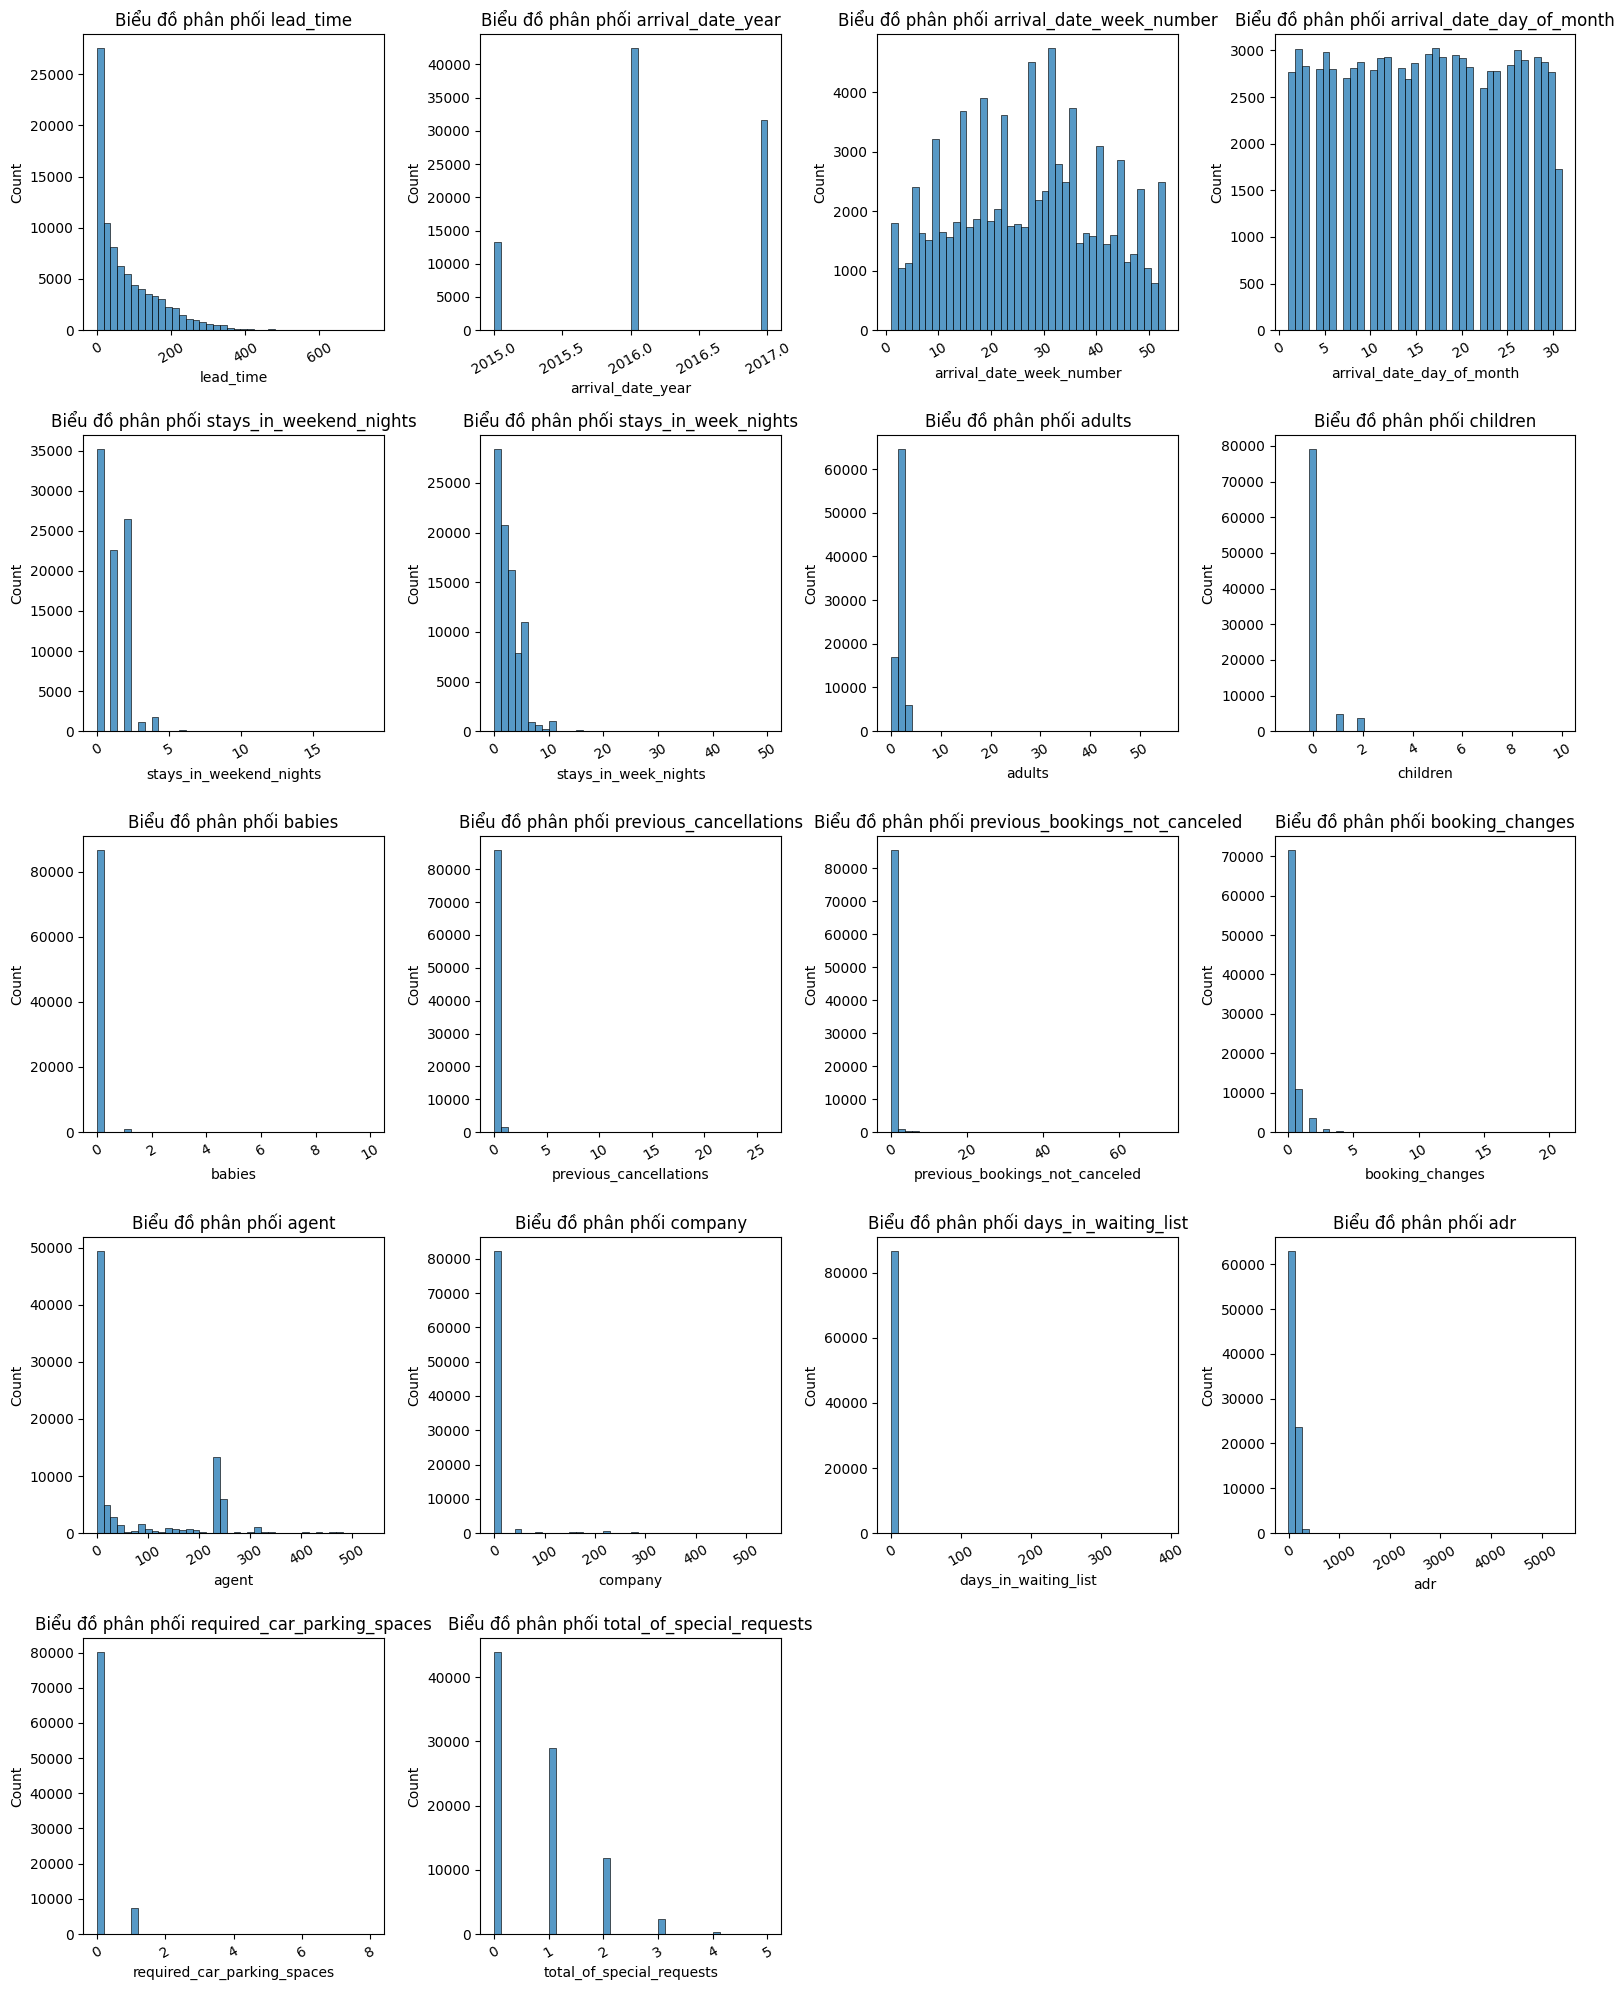

In [13]:
num_num_cols = len(num_list)
num_rows = num_num_cols // 4 + (1 if num_num_cols % 4 != 0 else 0)

plt.figure(figsize=(16, 4 * num_rows))
for i, col in enumerate(num_list, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(df[col], bins=40)
    plt.title(f'Biểu đồ phân phối {col}')
    plt.xlabel(col)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- `lead_time`: Đa số các đặt phòng được thực hiện với thời gian chờ dẫn đầu (lead time) khá ngắn, chỉ khoảng vài ngày đến một tuần. Có một lượng nhỏ các đặt phòng được thực hiện với thời gian chờ dài hơn.

- `arrival_date_year`: Số lượng đặt phòng tăng đáng kể trong năm 2016 và 2017 so với năm 2015.

- `arrival_date_week_number` và `arrival_date_day_of_month`: Không có sự biến đổi lớn về mùa vụ hoặc ngày cụ thể trong tháng - phân phối khá đồng đều qua các tuần và ngày trong tháng.

- `stays_in_weekend_nights` và `stays_in_week_nights`: Số đêm nghỉ phổ biến nhất là từ 0 đến 2 đêm.

- `adults`, `children`, và `babies`: Phần lớn các đặt phòng được làm cho người lớn, với số lượng trẻ em và trẻ sơ sinh ít hơn nhiều.

- `previous_cancellations` và `previous_bookings_not_canceled`: Đa số khách hàng chưa từng hủy bỏ đặt phòng trước đó hoặc có lịch sử đặt phòng mà không hủy bỏ.

- `booking_changes`: Hầu hết đặt phòng không có sự thay đổi sau khi được đặt.

- `days_in_waiting_list`: Phần lớn khách hàng không phải chờ đợi để đặt phòng sau khi yêu cầu.

- `required_car_parking_spaces` và `total_of_special_requests`: Hầu hết các đặt phòng không yêu cầu chỗ đậu xe và có ít hoặc không có yêu cầu đặc biệt.

<a id="2.3"></a>


## <span style='color:#2B9C15 '>3. Phân tích tỷ lệ đó với biến categorical</span>


#### 👉 Thống kê mô tả các cột categorical

In [14]:
df[cate_list].describe()

,hotel,is_canceled,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396
unique,2,2,12,5,178,8,5,2,10,12,3,4,3,926
top,City Hotel,0,August,BB,PRT,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out,2/14/2016
freq,53428,63371,11257,67978,27453,51618,69141,83981,56552,46313,86251,71986,63371,211


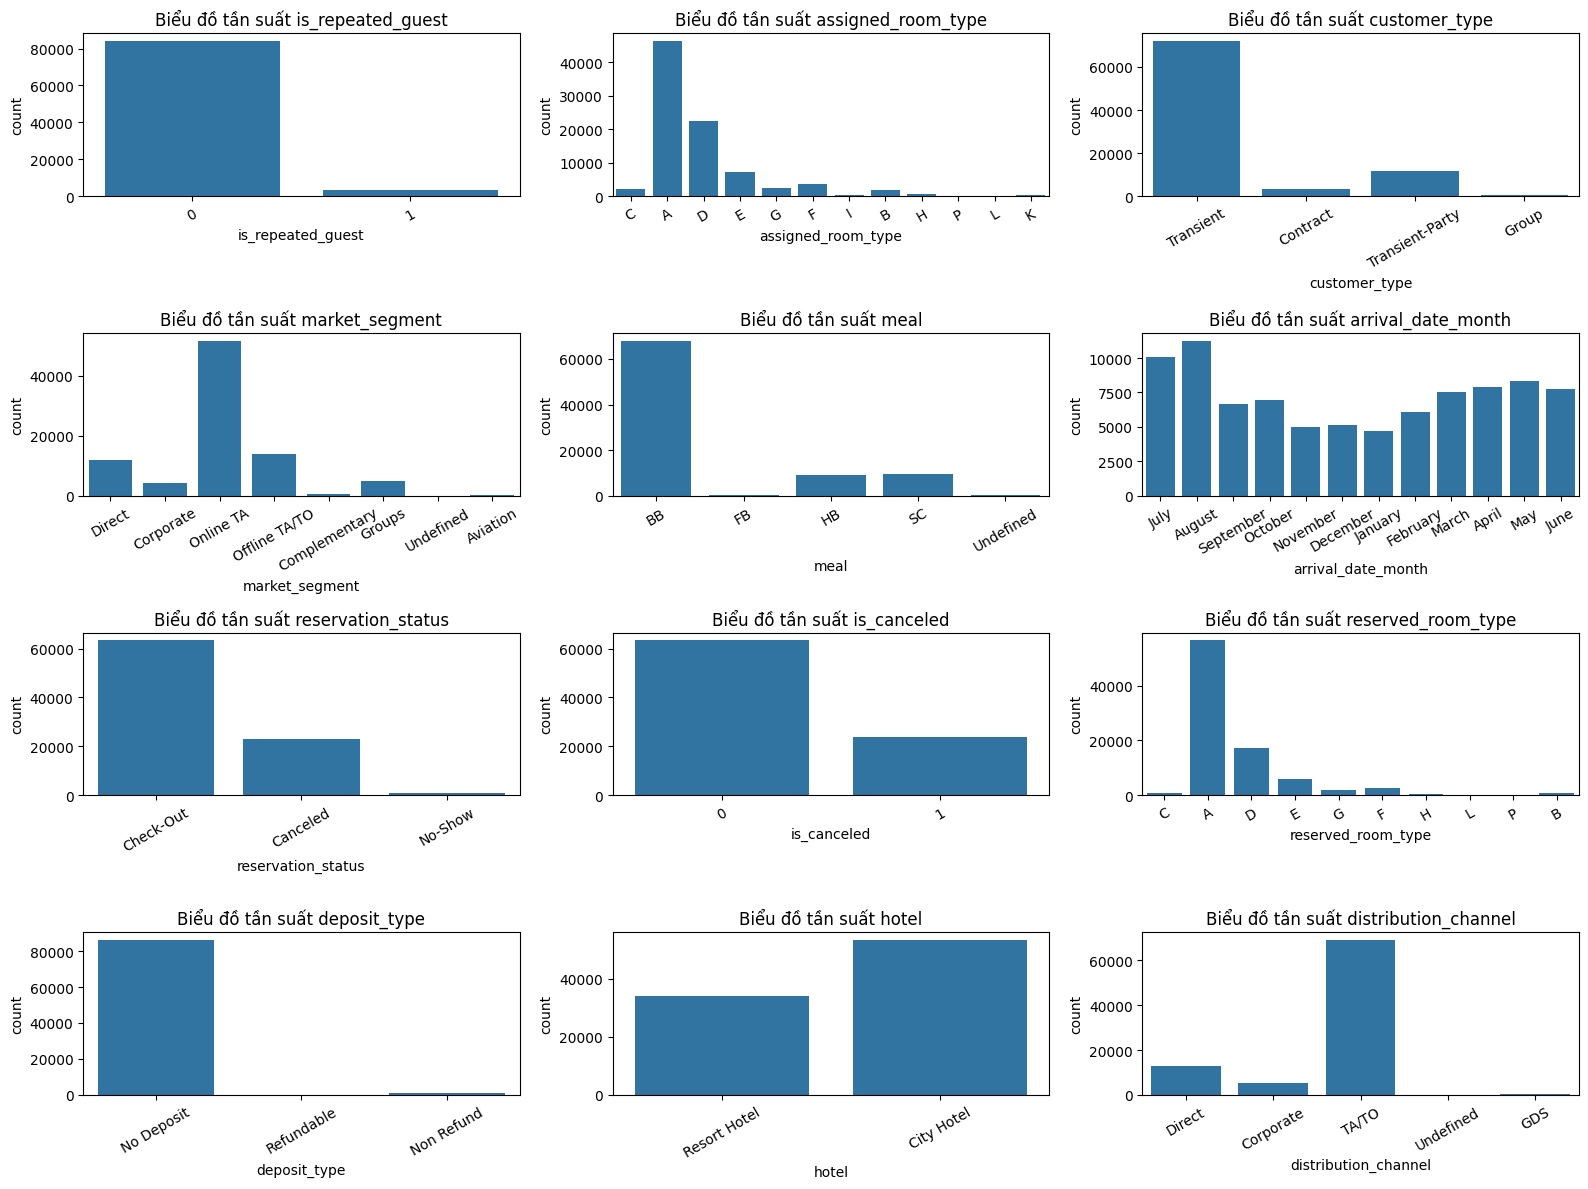

In [15]:

cate_cols_plot = list(set(cate_list) - set(['country', 'reservation_status_date']))
num_cate_cols = len(cate_cols_plot)
num_rows = num_cate_cols // 3 + (1 if num_cate_cols % 3 != 0 else 0)

plt.figure(figsize=(16, 3 * num_rows))
for i, col in enumerate(cate_cols_plot, 1):
        plt.subplot(num_rows, 3, i)
        sns.countplot(x=col, data=df)
        plt.title(f'Biểu đồ tần suất {col}')
        plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- `is_repeated_guest`: Hầu hết khách hàng đặt phòng không phải là khách hàng quay lại.

- `is_canceled`: Có một số lượng lớn đặt phòng đã được hủy (~ <sup>1</sup>&frasl;<sub>4</sub>).

- `reservation_status`: Đa số các đặt phòng đã được thanh toán và trải qua quá trình `check-out`, một lượng đáng kể bị hủy và chỉ một phần nhỏ là không có mặt (`no-show`).

- `hotel`: Có nhiều đặt phòng tại khách sạn thành phố (`City Hotel`) hơn là khách sạn nghỉ dưỡng (`Resort Hotel`).

- `distribution_channel`: Kênh phân phối chủ yếu cho đặt phòng là qua đại lý (`TA/TO`) với số lần đặt phòng nhiều nhất.

- `reserved_room_type`: Loại phòng được đặt nhiều nhất là loại A, tiếp theo là loại D và các loại phòng khác có số lượng đặt ít hơn rất nhiều.

- `arrival_date_month`: Tháng có số lượng đặt phòng cao nhất là tháng 8 (`Agust`), và thấp nhất vào tháng 1 (`January`). Ta có thể suy ra mùa cao điểm là mùa hè, còn mùa thấp điểm là mùa đông.

- `market_segment`: Phân khúc thị trường chính là `Online TA` với số lượng đặt phòng nổi bật hơn hẳn so với các phân khúc khác.

- `deposit_type`: Đa số các đặt phòng không yêu cầu đặt cọc (No Deposit). Có rất ít đặt phòng yêu cầu đặt cọc hoàn lại (Refundable) hoặc không hoàn lại (Non Refund).

- `customer_type`: Khách hàng chủ yếu là khách hàng lưu trú qua đêm (`Transient`), số lượng lớn hơn nhiều so với các loại khách hàng khác như hợp đồng (`Contract`) hay nhóm (`Group`).

- `assigned_room_type`: Giống như với loại phòng được đặt, loại phòng được chỉ định cũng chủ yếu là loại A, sau đó là loại D và các loại phòng khác có số lượng được chỉ định ít hơn nhiều.

- `meal`: Hầu hết khách hàng chọn gói ăn sáng (`BB` - Bed & Breakfast), tiếp theo là HB (bán pension) và FB (đầy đủ pension) với số lượng thấp hơn.


<a id="3"></a>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> III. EDA 2D  </b></div>

<a id="3.1"></a>

## <span style='color:#2B9C15 '>1. Phân tích hệ số tương quan giữa các biến numeric</span>


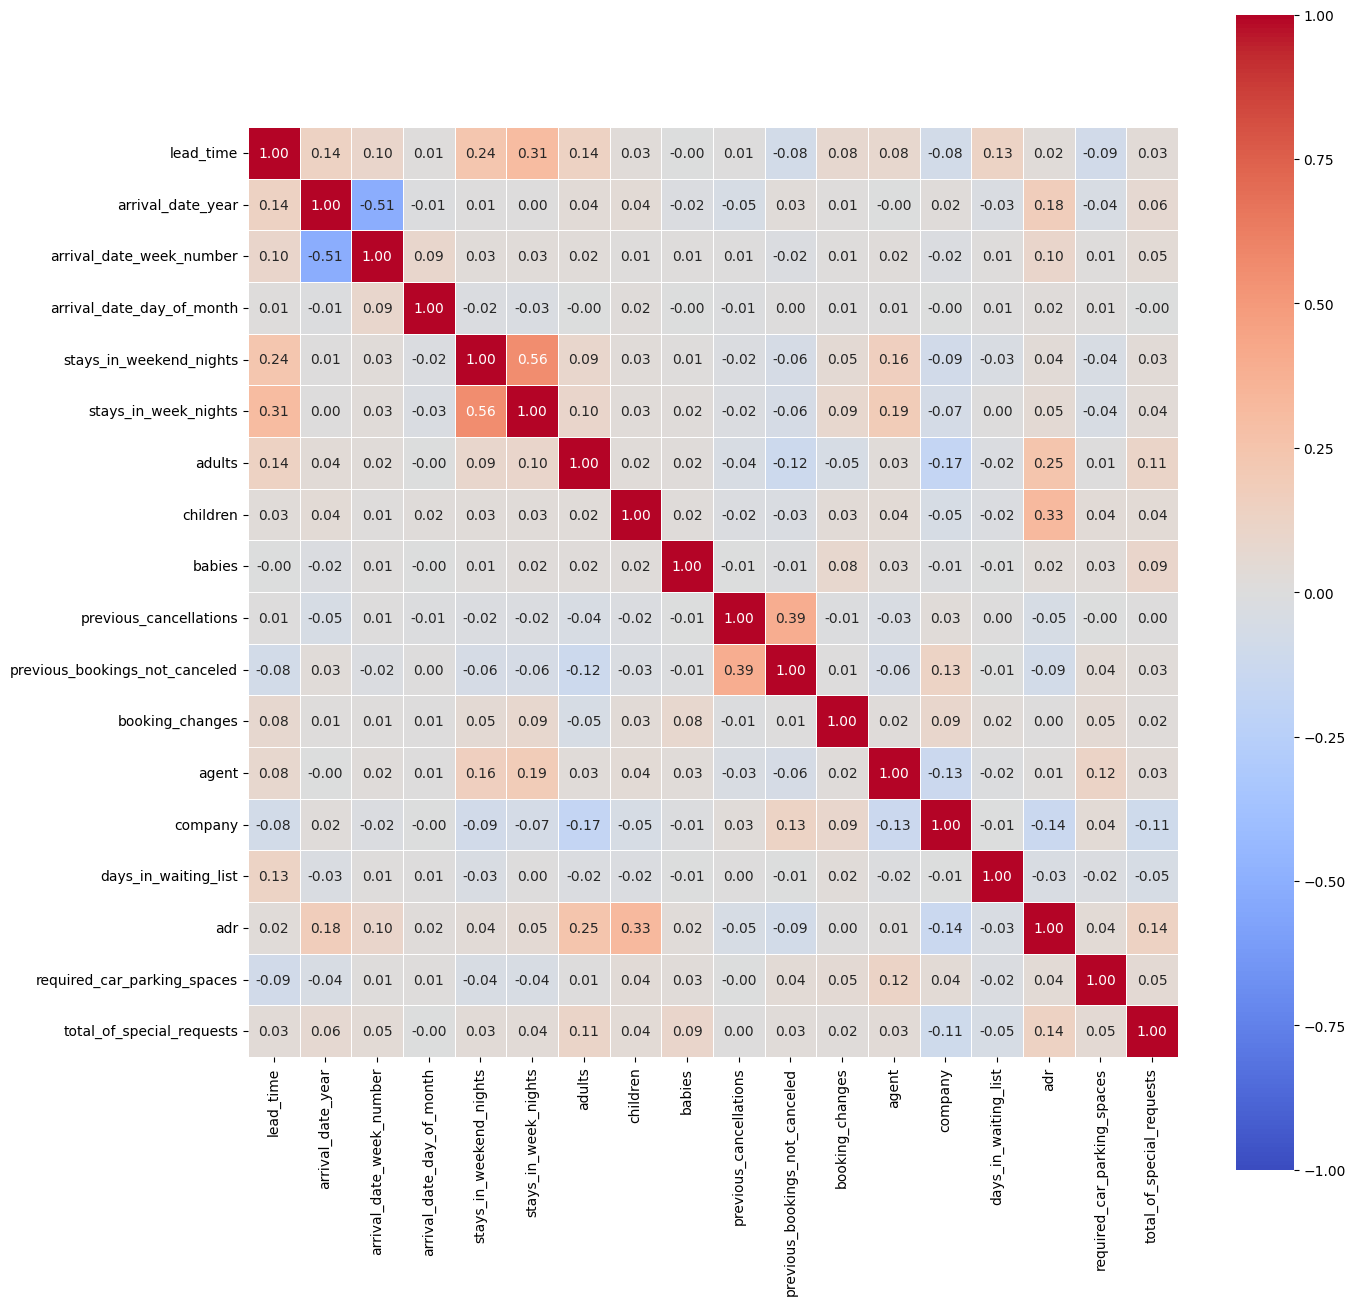

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df[num_list].corr(), annot=True, fmt=".2f", linewidths=.5, square = True,  vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- `stays_in_week_nights` và `stays_in_weekend_nights` có tương quan dương lớn (0.56). Điều này cho thấy khách hàng có xu hướng lưu trú cả trong tuần lẫn cuối tuần. Nói cách khác, những khách hàng chọn lưu trú nhiều đêm trong tuần thường cũng chọn lưu trú nhiều đêm vào cuối tuần. Điều này có thể phản ánh một xu hướng chung trong việc đặt phòng dài hạn hơn, không chỉ giới hạn ở việc lưu trú ngắn ngày.

- `lead_time` và `stays_in_week_nights` có tương quan dương vừa phải (0.31), có thể cho thấy khách hàng thường đặt phòng trước càng lâu thì càng có xu hướng lưu trú nhiều đêm trong tuần hơn.

- `adr` (Average Daily Rate) có một tương quan dương mạnh với `adults` (0.25) và `children` (0.33), nhưng lại có mức tương quan thấp với `babies` (0.04). Điều này cho thấy giá trung bình hàng ngày có liên quan đến số người lớn và trẻ em, nhưng không nhiều đối với số lượng em bé.

- `arrival_date_year` và `lead_time` có tương quan dương yếu (0.14), có thể cho thấy rằng việc đặt phòng trước không có sự thay đổi đáng kể theo năm.

- `agent` có tương quan nhỏ với hầu hết các biến khác, và một tương quan dương yếu với `booking_changes` (0.13), có thể là do việc đặt phòng qua đại lý có những điều chỉnh nhất định.

- `required_car_parking_spaces` và `adr` có một tương quan lên tới (0.14), cho thấy có thể khách đặt phòng với giá cao hơn có xu hướng yêu cầu nhiều chỗ đậu xe hơn.

- `total_of_special_requests` có một tương quan dương yếu với `booking_changes` (0.10), điều này có thể đến từ việc những khách hàng có nhiều yêu cầu đặc biệt hơn cũng thường xuyên thực hiện thay đổi đối với đặt phòng của họ.

<a id="3.2"></a>

## <span style='color:#2B9C15 '>2. Sử dụng Scatter plot để phân tích dữ liệu 2D</span>


👉 Ta sẽ dùng scatter plot để phân tích sự tương quan giữa 2 biến numeric có độ lớn hệ số tương quan >= 0.35 từ biểu đồ heatmap ở trên:

- `stay_in_week_nights` và `stay_in_weekend_nights`

- `previous_bookings_not_canceled` và `previous_cancellations`

**`stays_in_week_nights` và `stays_in_weekend_nights`**

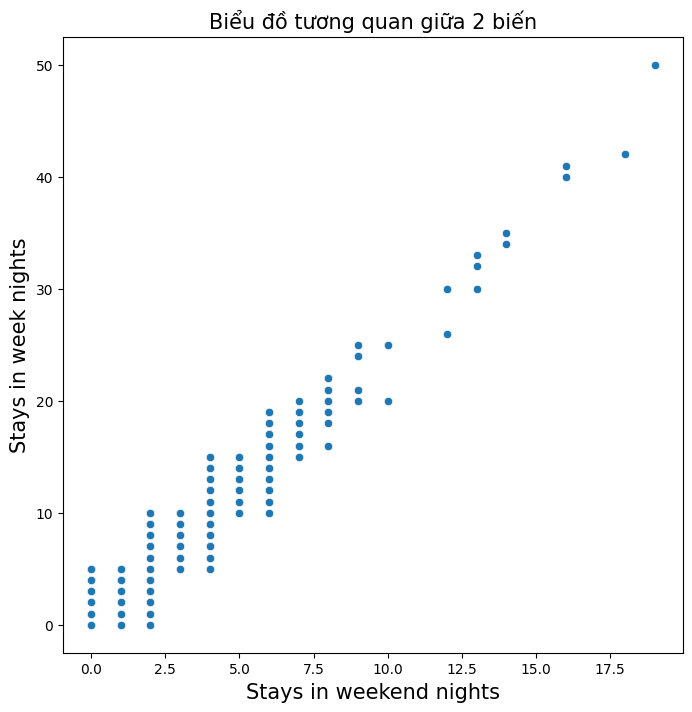

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.scatterplot(data=df, x="stays_in_weekend_nights", y="stays_in_week_nights")
plt.title('Biểu đồ tương quan giữa 2 biến', size= 15)
plt.xlabel('Stays in weekend nights', size= 15)
plt.ylabel('Stays in week nights', size= 15)
plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Dựa vào biểu đồ ta thấy có tương quan dương giữa 2 biến cho thấy khách hàng có xu hướng lưu trú cả trong tuần lẫn cuối tuần. 
- Nói cách khác, những khách hàng chọn lưu trú nhiều đêm trong tuần thường cũng chọn lưu trú nhiều đêm vào cuối tuần. 
- Điều này có thể phản ánh một xu hướng chung trong việc đặt phòng dài hạn hơn, không chỉ giới hạn ở việc lưu trú ngắn ngày.

**`previous_bookings_not_canceled` và `previous_cancellations`**

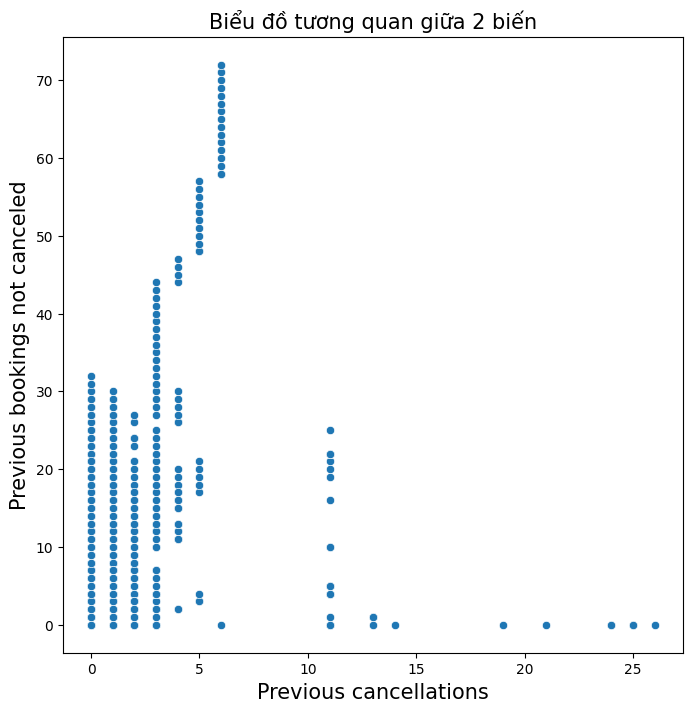

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.scatterplot(data=df, x="previous_cancellations", y="previous_bookings_not_canceled")
plt.title('Biểu đồ tương quan giữa 2 biến', size= 15)
plt.xlabel('Previous cancellations', size = 15)
plt.ylabel('Previous bookings not canceled', size = 15)
plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Có một số lượng lớn các điểm dữ liệu tập trung ở góc dưới bên trái của biểu đồ, cho thấy rằng hầu hết khách hàng không hủy đặt phòng khi họ không có lịch sử hủy bỏ trước đó.
- Khi số lượng hủy bỏ trước đó tăng lên, số lượng đặt phòng không hủy giảm xuống rõ rệt, điều này cho thấy khách hàng có lịch sử hủy bỏ đặt phòng có xu hướng tiếp tục hủy đặt phòng trong tương lai.


<a id="3.3"></a>

## <span style='color:#2B9C15 '>3. Sử dùng bar chart để phân tích dữ liệu numeric và categorical</span>

In [19]:
df.groupby([cate_list[0]]).agg({num_list[2]: ['min', 'mean', 'std', 'max']})

arrival_date_week_number                         
                                  min       mean       std max
hotel                                                         
City Hotel                          1  26.637606  13.58628  53
Resort Hotel                        1  27.154057  13.80660  53

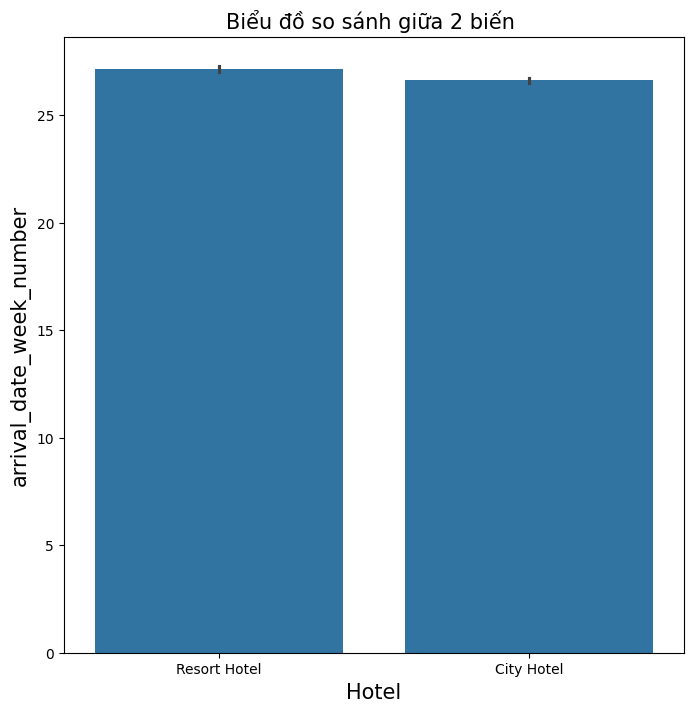

In [20]:
# bar chart of adr and hotel
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.barplot(x='hotel', y='arrival_date_week_number', data=df)
plt.title('Biểu đồ so sánh giữa 2 biến ', size= 15)
plt.xlabel('Hotel', size= 15)
plt.ylabel('arrival_date_week_number', size= 15)
plt.show()


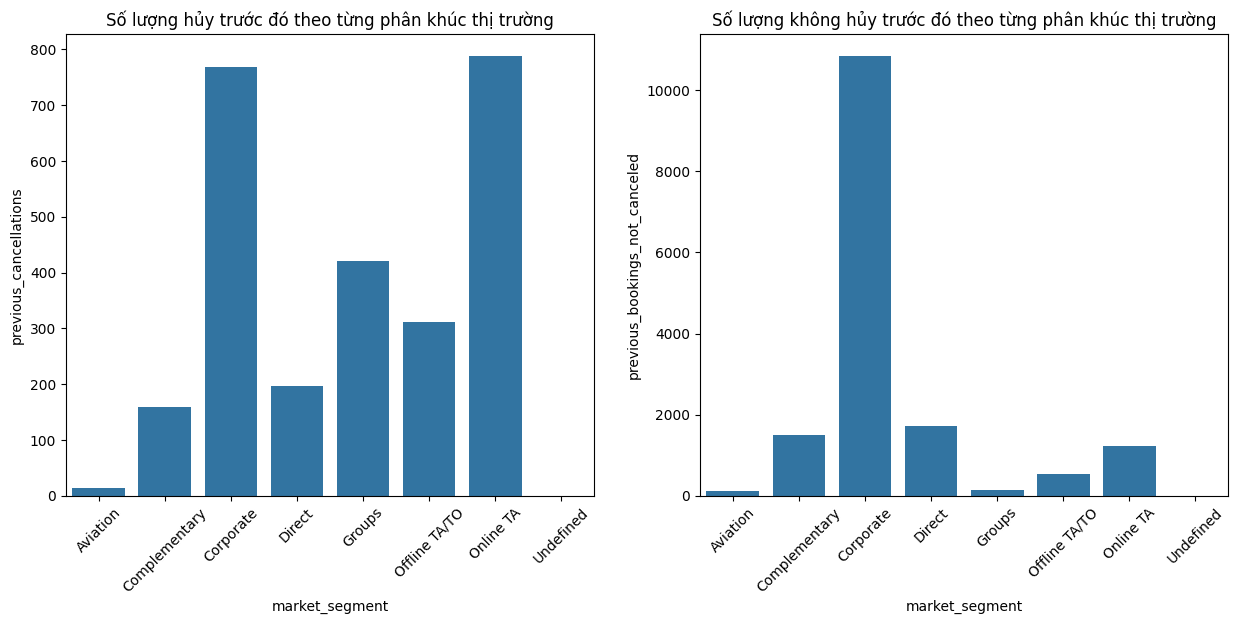

In [21]:
market_previous_cancellation = df.groupby('market_segment').agg({'previous_cancellations': 'sum'}).reset_index()
market_not_cancellation = df.groupby('market_segment').agg({'previous_bookings_not_canceled': 'sum'}).reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.barplot(x='market_segment', y='previous_cancellations', data=market_previous_cancellation, ax=ax[0])
sns.barplot(x='market_segment', y='previous_bookings_not_canceled', data=market_not_cancellation, ax=ax[1])
ax[0].set_title('Số lượng hủy trước đó theo từng phân khúc thị trường')

ax[0].xaxis.set_tick_params(rotation=30)
ax[1].set_title('Số lượng không hủy trước đó theo từng phân khúc thị trường')
ax[1].xaxis.set_tick_params(rotation=30)

plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Phân khúc Corporate có số lượng hủy đặt phòng cao nhất trong tất cả các phân khúc thị trường được nêu, với gần 800 hủy đặt phòng.
- Tuy nhiên, phân khúc Corporate cũng có lượng đặt phòng không bị hủy cao nhất, với hơn 10.000 đặt phòng không hủy.
- Phân khúc Groups có số lượng hủy đặt phòng khá cao, nhưng số lượng đặt phòng không hủy lại rất thấp


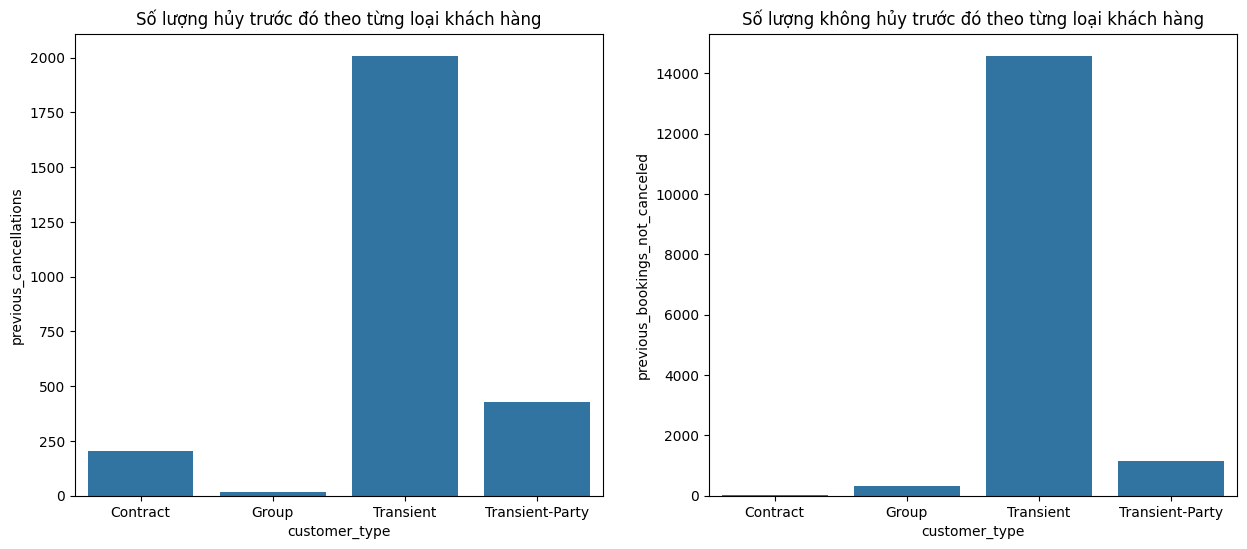

In [22]:
customer_previos_cancellations = df.groupby('customer_type').agg({'previous_cancellations': 'sum'}).reset_index()
customer_not_cancellations = df.groupby('customer_type').agg({'previous_bookings_not_canceled': 'sum'}).reset_index()

fig, ax = plt.subplots(figsize=(15, 6), nrows=1, ncols=2)
sns.barplot(x='customer_type', y='previous_cancellations', data=customer_previos_cancellations, ax=ax[0])
sns.barplot(x='customer_type', y='previous_bookings_not_canceled', data=customer_not_cancellations, ax=ax[1])
ax[0].set_title('Số lượng hủy trước đó theo từng loại khách hàng')
ax[1].set_title('Số lượng không hủy trước đó theo từng loại khách hàng')
plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Khách hàng loại `Transient` có tỷ lệ hủy đặt phòng cao nhất so với các loại khách hàng khác. Điều này thể hiện qua cột màu xanh lá cây cao vượt trội trong biểu đồ hủy đặt phòng.

- Mặc dù tỷ lệ hủy đặt phòng của khách hàng `Transient` cao, nhưng số lượng đặt phòng không hủy của loại khách hàng này cũng là cao nhất. Điều này có thể là do tổng số lượng đặt phòng của khách hàng `Transient` rất lớn, do đó cả số lượng hủy đặt và số lượng không hủy đặt đều cao.

- Khách hàng loại `Contract` có số lượng hủy đặt phòng trên tổng số lượng đặt phòng loại `Contract` khá là lớn

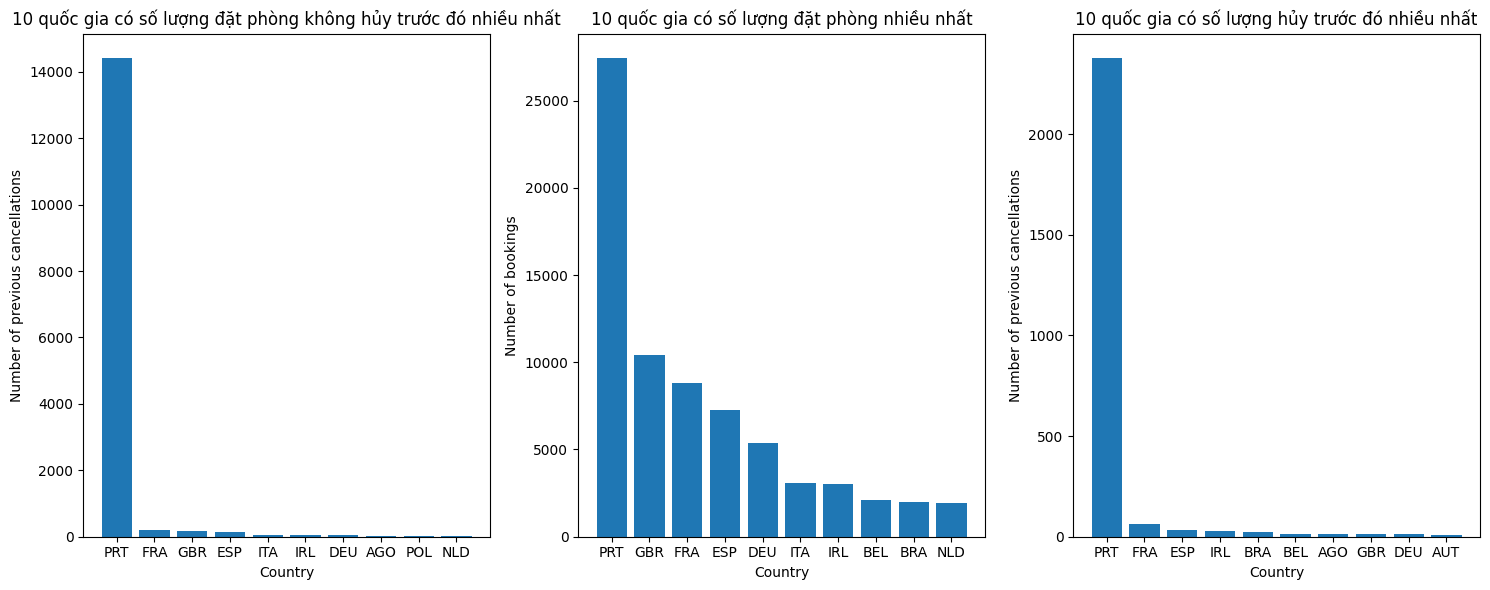

In [23]:
top_10_countries = df[df['country'] != -1].groupby('country').agg({'previous_bookings_not_canceled': 'sum'}).nlargest(10, 'previous_bookings_not_canceled')

# Reset index to make 'country' a column instead of index
top_10_countries = top_10_countries.reset_index()
fig, ax = plt.subplots(figsize=(15, 6), nrows=1, ncols=3)
ax[0].bar(top_10_countries['country'], top_10_countries['previous_bookings_not_canceled'])
ax[0].set_title('10 quốc gia có số lượng đặt phòng không hủy trước đó nhiều nhất')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Number of previous cancellations')

top_10_countries = df[df['country'] != -1].groupby('country').count().nlargest(10, 'hotel')
top_10_countries = top_10_countries.reset_index()
ax[1].bar(top_10_countries['country'], top_10_countries['hotel'])
ax[1].set_title('10 quốc gia có số lượng đặt phòng nhiều nhất')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Number of bookings')

top_10_countries = df[df['country'] != -1].groupby('country').agg({'previous_cancellations': 'sum'}).nlargest(10, 'previous_cancellations')
top_10_countries = top_10_countries.reset_index()
ax[2].bar(top_10_countries['country'], top_10_countries['previous_cancellations'])
ax[2].set_title('10 quốc gia có số lượng hủy trước đó nhiều nhất')
ax[2].set_xlabel('Country')
ax[2].set_ylabel('Number of previous cancellations')

plt.tight_layout()
plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Quốc gia PRT (Bồ Đào Nha) dẫn đầu cả ba biểu đồ, điều này cho thấy rằng không chỉ có số lượng đặt phòng mà cũng có tỷ lệ hủy phòng cao đến từ quốc gia này.
- Trong top 5 quốc gia có số lượng đặt phòng lớn nhất gồm GBR (Anh Quốc), FRA (Pháp), ESP (Tây Ban Nha), DEU (Đức) nhưng số lượng hủy đặt phòng trước đó có tỷ lệ rất thấp.

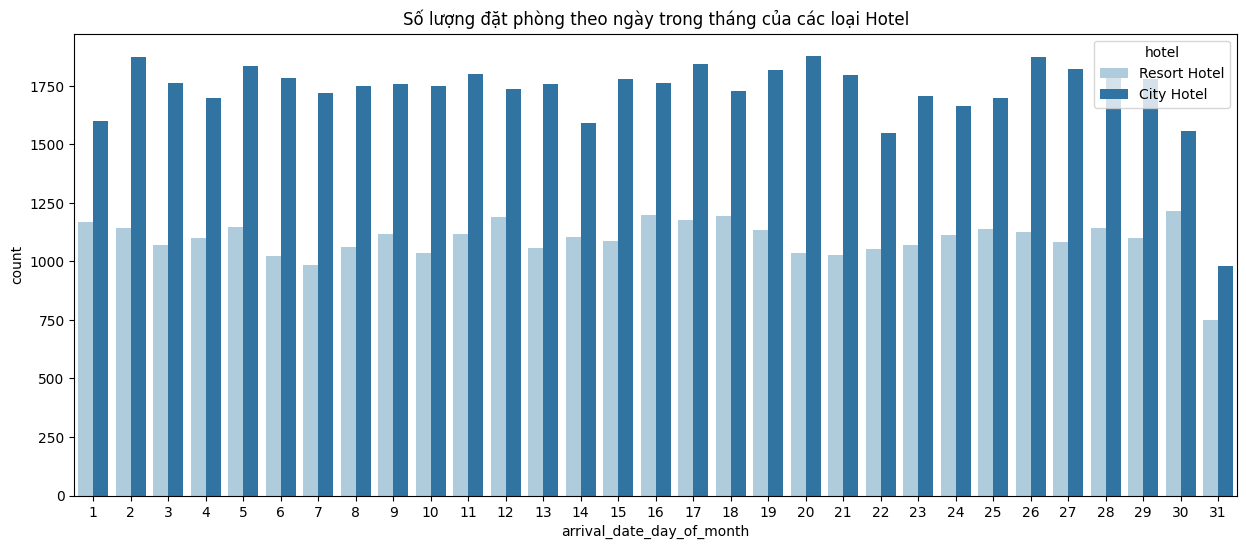

In [24]:
plt.figure(figsize=(15,6))

sns.countplot(data = df, x = 'arrival_date_day_of_month', hue='hotel', palette='Paired')
plt.title("Số lượng đặt phòng theo ngày trong tháng của các loại Hotel")
plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Số lượng đặt phòng của 2 loại `hotel` của các ngày trong tháng khá là đồng đều, ngoại trừ ngày 31. Có lẽ do tháng có ngày 31 ít hơn so với các ngày còn lại.
- Qua biểu đồ trên ta thấy được tỷ lệ đặt phòng của `Resort Hotel` lớn hơn nhiều so với `City Hotel`

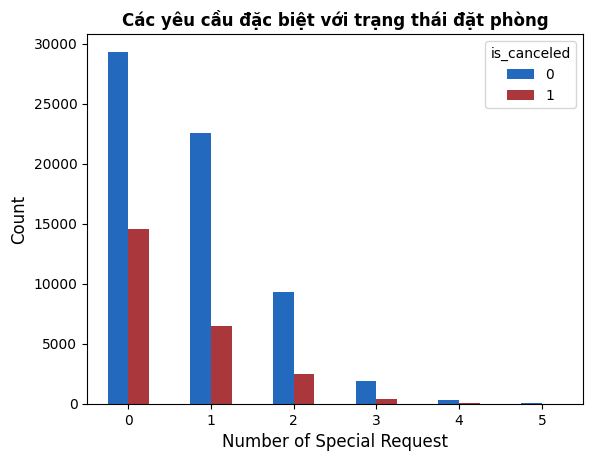

In [25]:
# convert to double bar chart
group_adr_request = df.groupby([ 'total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)
group_adr_request.plot(kind='bar', cmap='vlag')
plt.title('Các yêu cầu đặc biệt với trạng thái đặt phòng', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)
plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Ta thấy phần lớn số lượng đặt phòng không có bất cứ yêu cầu đặc biệt nào hoặc chỉ có 1-2 yêu cầu đặc biệt.
- Phân bố của số lượng yêu cầu đặc biệt của các lượt đặt phòng bị hủy cũng tương tự như số lượng đặt phòng không bị hủy.

<a id="3.4"></a>

## <span style='color:#2B9C15 '>4. Tính tỉ trọng đối với hai biến categorical</span>

#### 👉 Tỷ trọng giữa 2 biến `hotel` và `arrival_date_month`

In [26]:
result = df.groupby([cate_list[0], cate_list[2]]).agg({cate_list[2]: 'count'})/len(df)*100
result = result.round(2)
result

arrival_date_month
hotel        arrival_date_month                    
City Hotel   April                             5.81
             August                            7.54
             December                          3.45
             February                          4.12
             January                           3.12
             July                              6.57
             June                              5.73
             March                             5.56
             May                               6.19
             November                          3.37
             October                           4.81
             September                         4.85
Resort Hotel April                             3.24
             August                            5.34
             December                          2.42
             February                          2.85
             January                           2.25
             July                              4.94
             June                              3.16
             March                             3.04
             May                               3.37
             November                          2.35
             October                           3.12
             September                         2.80

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Ta thấy ở cả loại `hotel` đều có điểm chung là các tháng cao điểm đều rơi vào tháng 7 và tháng 8.
- Trong khi đó các tháng như 11, 12 và tháng 1 thì có số lượng đặt phòng thấp hơn mặt bằng chung.

#### 👉 Tỷ trọng giữa 2 biến `hotel` và `reservation_status`

In [27]:
result = df.groupby([cate_list[0], cate_list[12]]).agg({cate_list[12]: 'count'})/len(df)*100
result = result.round(2)
result

reservation_status
hotel        reservation_status                    
City Hotel   Canceled                         17.51
             Check-Out                        42.77
             No-Show                           0.86
Resort Hotel Canceled                          8.82
             Check-Out                        29.74
             No-Show                           0.30

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Ở cả 2 loại `hotel` status `Check-Out` đều chiếm phần lớn cụ thể: ở `Resort Hotel` chiếm hơn 75% và `City Hotel` chếm hơn 70%

#### 👉 Tỷ trọng giữa 2 biến `deposit_type` và `reservation_status`

In [28]:
result = df.groupby([cate_list[10], cate_list[12]]).agg({cate_list[12]: 'count'})/len(df)*100
result = result.round(2)
result

reservation_status
deposit_type reservation_status                    
No Deposit   Canceled                         25.18
             Check-Out                        72.35
             No-Show                           1.15
Non Refund   Canceled                          1.12
             Check-Out                         0.06
             No-Show                           0.01
Refundable   Canceled                          0.03
             Check-Out                         0.09
             No-Show                           0.00

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Dựa vào bảng ta biết được phần lớn số lượng đặt phòng đều không yêu cầu đặt cọc trước (No Deposit), và trong đó tỷ lệ `Check-Out` của loại này chiếm hơn 70%
- Các loại còn lại chiếm tỷ trọng khá nhỏ trong đó có `Non-Refund` với tỷ lệ `Canceled lại khá cao khi chiếm gần như toàn bộ loại này.

#### 👉 Tỷ trọng giữa 2 biến `hotel` và `deposit_type`

In [29]:
result = df.groupby([cate_list[0], cate_list[10]]).agg({cate_list[10]: 'count'})/len(df)*100
result = result.round(2)
result

deposit_type
hotel        deposit_type              
City Hotel   No Deposit           60.15
             Non Refund            0.97
             Refundable            0.02
Resort Hotel No Deposit           38.54
             Non Refund            0.22
             Refundable            0.11

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Như bảng ở trên thì ta thấy được tỷ lệ của các loại `deposit_type` đều tương đối như nhau ở cả 2 loại `hotel`. Tỷ lệ cao nhất ở `City Hotel` và `Resort Hotel` đều là `No Deposit` với tỷ lệ lần lượt là 60% và 38%.

#### 👉 Tỷ trọng giữa 2 biến `is_canceled` và `arrival_date_month`

In [30]:
result = df.groupby([cate_list[1], cate_list[2]]).agg({cate_list[2]: 'count'})/len(df)*100
result = result.round(2)
result

arrival_date_month
is_canceled arrival_date_month                    
0           April                             6.29
            August                            8.73
            December                          4.29
            February                          5.36
            January                           4.18
            July                              7.85
            June                              6.19
            March                             6.50
            May                               6.77
            November                          4.51
            October                           6.06
            September                         5.78
1           April                             2.76
            August                            4.15
            December                          1.58
            February                          1.62
            January                           1.19
            July                              3.66
            June                              2.69
            March                             2.09
            May                               2.79
            November                          1.21
            October                           1.88
            September                         1.88

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Ta thấy tổng tỷ lệ của các lượt đặt phòng hùy thấp hơn so với không hủy, nhưng phân bố tỷ lệ giữa của các tháng thì có vẻ giống nhau. Bằng chứng là số lượng đặt phòng tháng 7 và 8 có tỷ lệ không hủy cao nhất nhưng lại vừa có tỷ lệ hủy phòng cao nhất.

<a id="4"></a>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> IV. EDA 3D   </b></div>

<a id="4.1"></a>

## <span style='color:#2B9C15 '>1. Sử dụng Scatter plot để phân tích dữ liệu 3D cho ba biến num</span>

`adults`, `children`, và `babies`

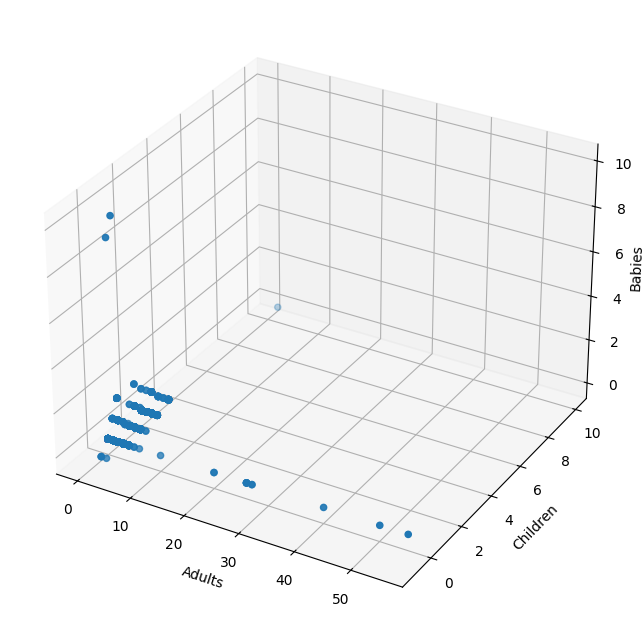

In [31]:
# plot 3d for 'adults', 'children', 'babies'
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df['adults'], df['children'], df['babies'])
ax.set_xlabel('Adults')
ax.set_ylabel('Children')
ax.set_zlabel('Babies')
ax.zaxis.labelpad = -0.95
plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Từ biểu đồ ta có thể thấy chủ yếu các điểm dữ liệu tập trung ở góc trái phía dưới (gần gốc tọa độ), cho thấy phần lớn các đặt phòng đều là cho người lớn, và chỉ một số ít đặt phòng cho trẻ em hoặc em bé.

- Chủ yếu các đặt phòng cho trẻ em và em bé đều là khi có người lớn đi kèm, và số lượng trẻ em và em bé không quá nhiều. Đa số rơi vào 1-4 trẻ em và 1-2 em bé.

`arrival_date_year`, `arrival_date_month`, và `arrival_date_day_of_month`

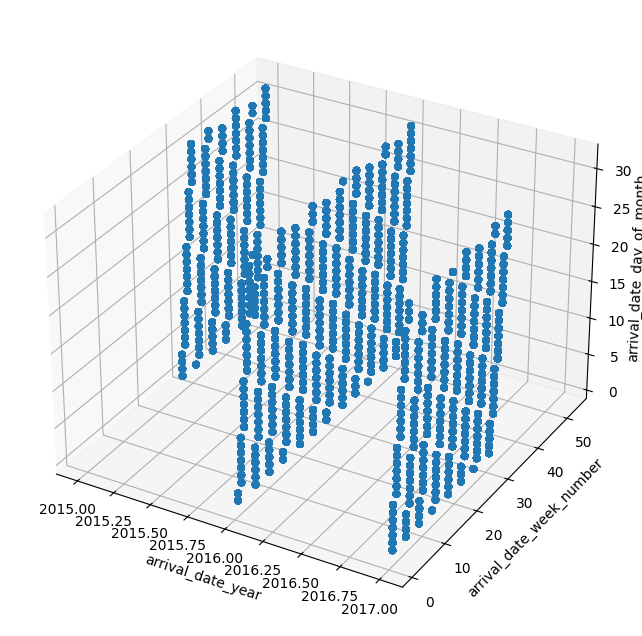

In [39]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(df[num_list[1]], df[num_list[2]], df[num_list[3]])
ax.set_xlabel(num_list[1])
ax.set_ylabel(num_list[2])
ax.set_zlabel(num_list[3])
ax.zaxis.labelpad = -0.95
plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Biểu đồ có 3 trục tọa độ: trục x (năm), trục y(số tuần trong năm) và trục z (ngày trong tháng) 

- Từ biểu đồ ta thấy rằng số điểm dữ liệu bắt đầu từ giữa năm 2015 đến giữa năm 2017, và phân bố khá đều qua các tuần trong năm và các ngày trong tháng.

- Mỗi ngày trong tháng có số lượng đặt phòng khá đồng đều, không có sự biến đổi lớn qua các ngày trong tháng

`arrival_date_week_number`, `stays_in_weekend_nights`, và `stays_in_week_nights`

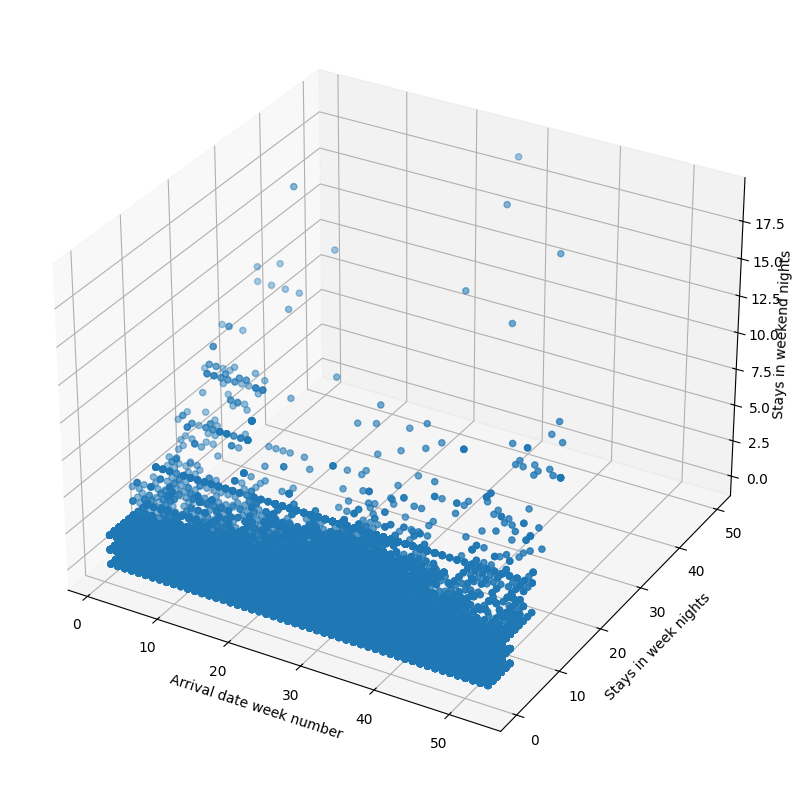

In [41]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
# add legend
ax.scatter(df['arrival_date_week_number'], df['stays_in_week_nights'], df['stays_in_weekend_nights'])
ax.set_xlabel('Arrival date week number')
ax.set_ylabel('Stays in week nights')
ax.set_zlabel('Stays in weekend nights')
ax.zaxis.labelpad = -0.95
plt.show()


#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Nhìn vào biểu đồ ta có thể thấy một dài các điểm dữ liệu dày đặc tập trung dọc gần trục `arrival_date_week_number`, cho thấy rằng số lượng đặt phòng khá nhiều xuyên suốt các tuần trong năm.

- Trục `stays_in_weekend_nights` và `stays_in_week_nights` cho biết thời gian ở lại cuối tuần và trong tuần, và ta thấy rằng có chủ yếu các lượt đặt phòng ở lại khoảng 1-15 ngày trong tuần và 1-4 ngày vào cuối tuần.

- Ở các tuần đầu năm và cuối năm ta thấy số lượng đặt phòng có xu hướng ở lại nhiều hơn vào cuối tuần khi các điểm dữ liệu bắt đầu xuất hiện ở tọa độ cao hơn trên trục `stays_in_weekend_nights`

<a id="4.2"></a>

## <span style='color:#2B9C15 '>2. Sử dụng Scatter plot 2D và màu đối với hai biến num và cate</span>

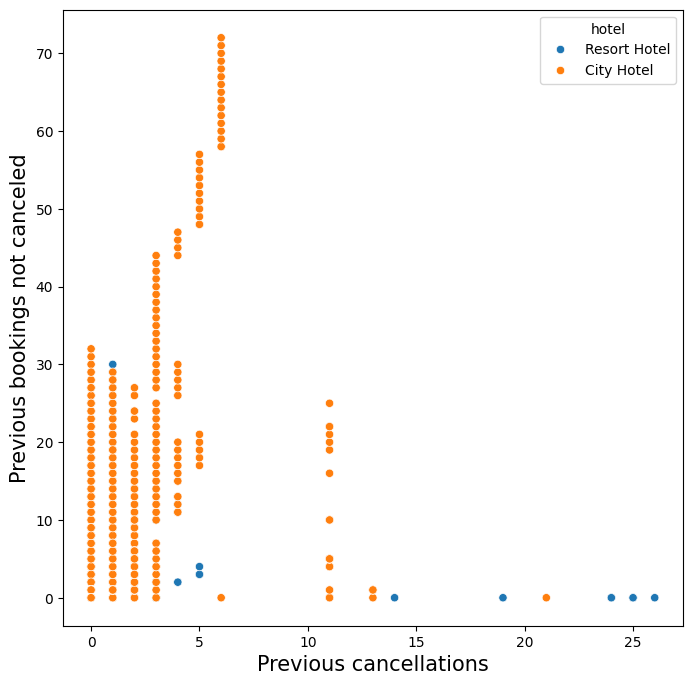

In [34]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.scatterplot(data=df, x="previous_cancellations", y="previous_bookings_not_canceled", hue='hotel')
plt.xlabel('Previous cancellations', size = 15)
plt.ylabel('Previous bookings not canceled', size = 15)
plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- `City Hotel` có số lượng booking không bị hủy nhiều hơn so với `Resort Hotel`.
- Ở phía trái trên của biểu đồ, chúng ta có thể thấy rằng với số lần hủy trước đó thấp, `City Hotel` thường có số lượng booking không bị hủy cao hơn so với `Resort Hotel`.
- Tại các giá trị thấp hơn của `Previous cancellations`, có nhiều booking không bị hủy hơn, trong khi ở các giá trị cao hơn, số lượng booking không bị hủy giảm mạnh cho thấy có thể có một xu hướng tiêu cực giữa hai biến được biểu diễn.

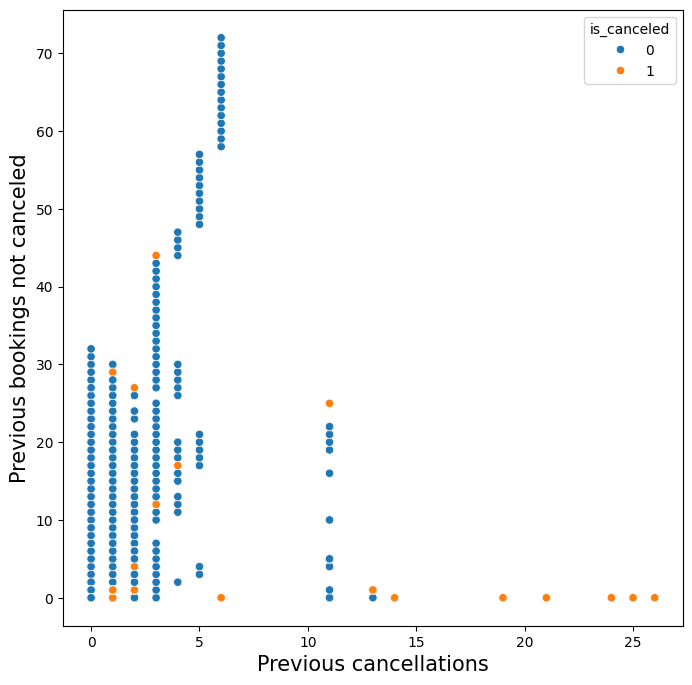

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.scatterplot(data=df, x="previous_cancellations", y="previous_bookings_not_canceled", hue='is_canceled')
plt.xlabel('Previous cancellations', size = 15)
plt.ylabel('Previous bookings not canceled', size = 15)
plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Chúng ta có thể nhìn thấy một số điểm màu cam đại diện cho các trường hợp đặt phòng được hủy bỏ (`is_canceled` = 1). Điều này cho thấy rằng khách hàng có một số lượng hủy bỏ đặt phòng trước đây vẫn có khả năng hủy bỏ đặt phòng trong tương lai.
- Ở phía trái ta thấy các điểm với số lượt hủy đặt phòng trước đó ít và số lướng không hủy đặt phòng trước đó cao thì phần lớn đều sẽ không hủy đặt phòng (`is_canceled` = 0)
- Mặc dù có vài trường hợp hủy bỏ (`is_canceled` = 1) nằm trong phạm vi có `Previous cancellations` cao, nhưng không thể kết luận chắc chắn về quy luật cố định nào từ biểu đồ này.

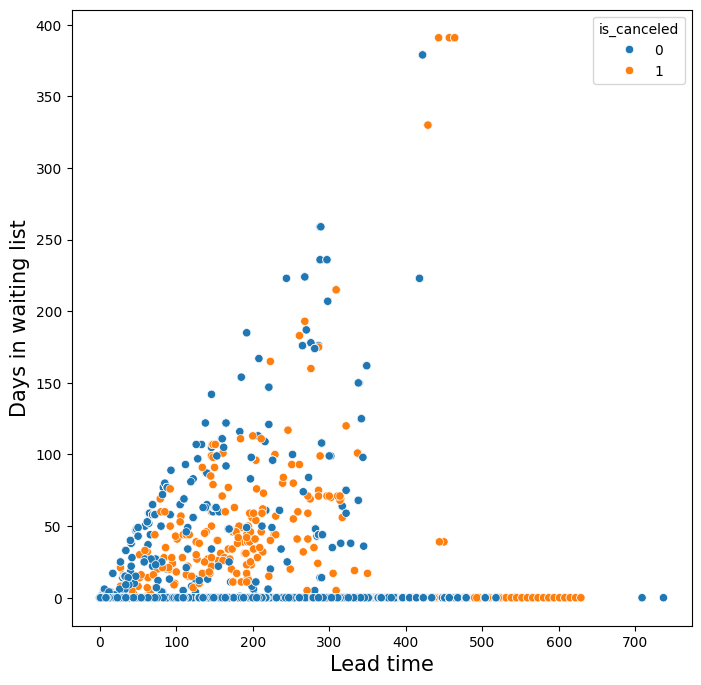

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.scatterplot(data=df, x="lead_time", y="days_in_waiting_list", hue='is_canceled')
plt.xlabel('Lead time', size = 15)
plt.ylabel('Days in waiting list', size = 15)
plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Đa số đặt phòng không bị hủy bỏ (điểm màu xanh) có `lead time` thấp và ít ngày nằm trong danh sách chờ.
- Cũng có một lượng đặt phòng đáng kể bị hủy bỏ (điểm màu cam) với `lead time` và số ngày nằm trong danh sách chờ thấp
- Một số ít số lượng đặt phòng với `lead time` rất cao (trên 400 ngày) hoặc nằm rất lâu trong danh sách chờ (trên 250 ngày) thường bị hủy bỏ.
- Phần lớn dữ liệu tập trung vào khu vực có `lead time` từ thấp đến trung bình (khoảng 0-200 ngày) và số ngày nằm trong danh sách chờ thấp (dưới 50 ngày), trong đó số đặt phòng không bị hủy chiếm đa số.

<a id="4.3"></a>

## <span style='color:#2B9C15 '>3. Tính tỉ trọng theo bin chia theo thể loại với hai biến cate</span>

In [48]:
df.groupby(['hotel', 'is_repeated_guest']).agg({'arrival_date_week_number': ['min', 'mean', 'std', 'max']})

arrival_date_week_number                        \
                                                    min       mean        std   
hotel        is_repeated_guest                                                  
City Hotel   0                                        1  26.643774  13.504116   
             1                                        1  26.450820  15.877587   
Resort Hotel 0                                        1  27.414835  13.639095   
             1                                        1  22.225542  15.876948   

                                    
                               max  
hotel        is_repeated_guest      
City Hotel   0                  53  
             1                  53  
Resort Hotel 0                  53  
             1                  53

In [46]:
df.groupby(['hotel', 'is_canceled']).agg({'lead_time': ['min', 'mean', 'std', 'max']})

lead_time                            
                               min        mean        std  max
hotel        is_canceled                                      
City Hotel   0                   0   67.387999  75.542625  518
             1                   0  101.645710  91.294653  629
Resort Hotel 0                   0   73.999115  89.519625  737
             1                   0  113.915873  92.502393  471

In [37]:
df.groupby(cate_list[0]).agg({num_list[1]: ['min', 'mean', 'std', 'max'], num_list[2]: ['min', 'mean', 'std', 'max']})

arrival_date_year                               \
                           min         mean       std   max   
hotel                                                         
City Hotel                2015  2016.253968  0.659292  2017   
Resort Hotel              2015  2016.141604  0.720948  2017   

             arrival_date_week_number                           
                                  min       mean       std max  
hotel                                                           
City Hotel                          1  26.637606  13.58628  53  
Resort Hotel                        1  27.154057  13.80660  53

<a id="5"></a>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> V. Insight   </b></div>


### <span style='color:#2B9C15 '>1. Data Understanding </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Tập dữ liệu gồm 119390 dòng và 32 cột. Mỗi dòng trong bộ dữ liệu gồm thông tin về một lượt đặt phòng khách sạn

- Trong đó có 2 cột thiếu dữ liệu nhiều nhất với cột `company` hơn 94% dòng dữ liệu bị thiếu và cột `agent` là hơn 13%

- Số trường dữ liệu bị thiếu ở mỗi dòng: Trong đó 91% các dòng bị thiếu 1 trường dữ liệu, 8% các dòng bị thiếu 2 trường dữ liệu.

- Tỷ lệ dòng dữ liệu bị trùng lặp là 26.8%. 

- Nhóm đã điền tất cả các giá trị thiếu trong bộ dữ liệu bằng giá trị `-1` để có thể dùng đến các cột có giá trị thiếu trong quá trình phân tích dữ liệu

- Sau khi điền giá trị thiếu, xóa những dòng dữ liệu trùng lặp, bộ dữ liệu còn lại gồm 87396 dòng và 32 cột



### <span style='color:#2B9C15 '>2. EDA 1D </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Dựa vào biểu đồ phân phối của trường `lead_time` ta thấy phần lớn người đặt phòng sẽ nhận phòng sớm trong vòng 10 ngày, trong đó hơn `6000` số lượng đặt phòng sẽ nhận phòng ngay lập tức.

- Ta cũng biết được năm 2016 là năm có số lượng đặt phòng lớn nhất.

- Số lượng đặt phòng ở City Hotel gấp 1.5 lần số lượng đặt Resort Hotel. Gần như toàn bộ khách hàng đều là khách mới, có một số lượng nhỏ là khách cũ và 82% khách hàng là dạng `Transient` (Tạm thời)
- Trong tổng số lượng đặt phòng thì có <sup>3</sup>&frasl;<sub>4</sub> phòng đã `check out` và <sup>1</sup>&frasl;<sub>3</sub> còn lại đã `canceled` và gần như toàn bộ số lượng đặt phòng đều là `no deposit` (Không đặt cọc)
- Từ biểu đồ số lượng đặt phòng ở các tháng ta thấy rằng số lượng đặt phòng vào tháng 7 và 8 là nhiều nhất. Theo thống kê thì đây là 2 tháng mà số lượng người đi du lịch là nhiều nhất nên số lượng đặt phòng cũng tăng theo.


### <span style='color:#2B9C15 '>3. EDA 2D </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">


- **Những rút trích từ heatmap về tương quan giữa các biến numeric:**

    - `stays_in_week_nights` và `stays_in_weekend_nights` có tương quan dương lớn (0.56). Điều này cho thấy khách hàng có xu hướng lưu trú cả trong tuần lẫn cuối tuần. Nói cách khác, những khách hàng chọn lưu trú nhiều đêm trong tuần thường cũng chọn lưu trú nhiều đêm vào cuối tuần. Điều này có thể phản ánh một xu hướng chung trong việc đặt phòng dài hạn hơn, không chỉ giới hạn ở việc lưu trú ngắn ngày.

    - `lead_time` và `stays_in_week_nights` có tương quan dương vừa phải (0.31), có thể cho thấy khách hàng thường đặt phòng trước càng lâu thì càng có xu hướng lưu trú nhiều đêm trong tuần hơn.

    - `adr` (Average Daily Rate) có một tương quan dương mạnh với `adults` (0.25) và `children` (0.33), nhưng lại có mức tương quan thấp với `babies` (0.04). Điều này cho thấy giá trung bình hàng ngày có liên quan đến số người lớn và trẻ em, nhưng không nhiều đối với số lượng em bé.

    - `arrival_date_year` và `lead_time` có tương quan dương yếu (0.14), có thể cho thấy rằng việc đặt phòng trước không có sự thay đổi đáng kể theo năm.

    - `agent` có tương quan nhỏ với hầu hết các biến khác, và một tương quan dương yếu với `booking_changes` (0.13), có thể là do việc đặt phòng qua đại lý có những điều chỉnh nhất định.

    - `required_car_parking_spaces` và `adr` có một tương quan lên tới (0.14), cho thấy có thể khách đặt phòng với giá cao hơn có xu hướng yêu cầu nhiều chỗ đậu xe hơn.

    - `total_of_special_requests` có một tương quan dương yếu với `booking_changes` (0.10), điều này có thể đến từ việc những khách hàng có nhiều yêu cầu đặc biệt hơn cũng thường xuyên thực hiện thay đổi đối với đặt phòng của họ.

- **Bar chart giữa biến numerical và categorical:**

    - Phân khúc Corporate có số lượng hủy đặt phòng cao nhất trong tất cả các phân khúc thị trường được nêu, với gần 800 hủy đặt phòng.

    - Tỷ lệ hủy đặt phòng của khách hàng `Transient` cao, nhưng số lượng đặt phòng không hủy của loại khách hàng này cũng là cao nhất. Điều này có thể là do tổng số lượng đặt phòng của khách hàng `Transient` rất lớn, do đó cả số lượng hủy đặt và số lượng không hủy đặt đều cao.

    - Quốc gia PRT (Bồ Đào Nha) dẫn đầu số lượng đặt phòng và cũng có tỷ lệ hủy phòng nhất.

    - Trong top 5 quốc gia có số lượng đặt phòng lớn nhất gồm GBR (Anh Quốc), FRA (Pháp), ESP (Tây Ban Nha), DEU (Đức) và số lượng hủy đặt phòng trước đó của các nước này có tỷ lệ rất thấp.

    - Số lượng đặt phòng của 2 loại `hotel` của các ngày trong tháng khá là đồng đều, ngoại trừ ngày 31. Có lẽ do tháng có ngày 31 ít hơn so với các ngày còn lại.

    - Phần lớn số lượng đặt phòng không có bất cứ yêu cầu đặc biệt nào hoặc chỉ có 1 yêu cầu đặc biệt.

- **Tỷ trọng giữa 2 biến categorical:**

    - Phần lớn số lượng đặt phòng đều không yêu cầu đặt cọc trước (No Deposit), và trong đó tỷ lệ `Check-Out` của loại này chiếm hơn 70%

    - Các loại còn lại chiếm tỷ trọng khá nhỏ trong đó có `Non-Refund` với tỷ lệ `Canceled` lại khá cao khi chiếm gần như toàn bộ loại này.

### <span style='color:#2B9C15 '>4. EDA 3D </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- `Phân loại đặt phòng theo đối tượng khách hàng:` Đa số đặt phòng là cho người lớn, chỉ có một số ít đặt phòng cho trẻ em hoặc em bé. Những đặt phòng cho trẻ em thường đi kèm với người lớn, và số lượng trẻ em và em bé thường không quá nhiều.

- `Phân bố thời gian đặt phòng qua các năm, tuần trong năm và ngày trong tháng:` Số lượng đặt phòng phân bố khá đều qua các năm, tuần trong năm và ngày trong tháng. Có xu hướng đặt phòng nhiều hơn vào giữa năm 2015 đến giữa năm 2017.

- `Thời gian lưu trú:` Đa số lượt đặt phòng lưu trú trong khoảng 1-15 ngày trong tuần và 1-4 ngày vào cuối tuần. Có xu hướng lưu trú nhiều hơn vào cuối tuần ở các tuần đầu và cuối năm.

- `Tỷ lệ hủy đặt phòng:` Số lượng đặt phòng không bị hủy nhiều hơn ở City Hotel so với Resort Hotel. Có một xu hướng tiêu cực giữa Previous cancellations và số lượng đặt phòng không bị hủy, nhưng không thể kết luận chắc chắn từ biểu đồ.

- `Lead time và số ngày nằm trong danh sách chờ:` Phần lớn đặt phòng không bị hủy có lead time và số ngày nằm trong danh sách chờ thấp, trong khi một số lượng đáng kể đặt phòng bị hủy có lead time và số ngày nằm trong danh sách chờ thấp.